In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Exploratory Data Analysis / Data Preprocessing</h1>

In [354]:
X_train=pd.read_csv('Train.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_train=pd.read_csv('Train.csv', usecols=['Price'])
X=pd.read_csv('Train.csv')

In [355]:
print(X_train.shape)
print(Y_train.shape)

(3750, 9)
(3750, 1)


In [356]:
X.isna().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [313]:
print("Overview of X_train input:\n\n", X_train.head(5).to_string())
print("\nOverview of Y_train input:\n\n", Y_train.head(5))

Overview of X_train input:

    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine       Power  Seats
0  2017              16500    Petrol       Manual      First  23.84 kmpl  1199 CC      84 bhp    5.0
1  2017              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC     100 bhp    7.0
2  2014              35000    Petrol       Manual      First   15.0 kmpl  1598 CC  103.52 bhp    5.0
3  2007             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC    53.5 bhp    5.0
4  2013              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   88.76 bhp    5.0

Overview of Y_train input:

    Price
0   5.00
1   8.37
2   4.50
3   0.85
4   2.65


In [314]:
def preprocessing(X_train):
    X_train['Engine'] = X_train['Engine'].str.replace('CC', '')
    X_train['Mileage'] = X_train['Mileage'].str.replace('kmpl', '')
    X_train['Power'] = X_train['Power'].str.replace('bhp', '')
    X_train['Engine'] = X_train['Engine'].astype(float)
    X_train['Mileage'] = X_train['Mileage'].astype(float)
    X_train['Power'] = pd.to_numeric(X_train['Power'],errors='coerce')
    X_train['Mileage']=X_train['Mileage'].fillna(X_train['Mileage'].mean())
    X_train['Engine']=X_train['Engine'].fillna(X_train['Engine'].mean())
    X_train['Seats']=X_train['Seats'].fillna(X_train['Seats'].mean())
    X_train['Power']=X_train['Power'].fillna(X_train['Power'].mean())
    owner_mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }    
    X_train['Owner_Type'] = X_train['Owner_Type'].map(owner_mapping)
    for col in ['Kilometers_Driven','Engine']:
        X_train[col] = np.log1p(X_train[col])
    return pd.get_dummies(X_train, columns=['Fuel_Type', 'Transmission'], drop_first=True)

def normx(X):
    X_norm = X.copy()
    for col in X.columns:
        if set(X[col].unique()) == {0} or set(X[col].unique()) == {0, 1}:
            continue  # Skip binary columns (or columns with zero variance)
        mean = X[col].mean()
        std = X[col].std()
        X_norm[col] = (X[col] - mean) / std
    return X_norm

def normy(Y):
    return (Y-Ymean)/Ystd



In [315]:
X_train = preprocessing(X_train)
X=preprocessing(X)

In [316]:
X_train[X_train['Fuel_Type_Electric']==True]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
330,2016,10.819798,1,18.041376,4.290459,41.0,5.0,True,False,False


In [317]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven  Owner_Type      Mileage       Engine        Power        Seats
count  3750.000000        3750.000000  3750.00000  3750.000000  3750.000000  3750.000000  3750.000000
mean   2013.313333          10.761298     1.20000    18.041376     7.331695   113.589670     5.277838
std       3.264250           0.712397     0.45496     4.522298     0.342193    53.515557     0.802768
min    1998.000000           6.908755     1.00000     0.000000     4.290459    34.200000     2.000000
25%    2011.000000          10.434145     1.00000    15.260000     7.089243    78.000000     5.000000
50%    2014.000000          10.878066     1.00000    18.000000     7.310550    98.600000     5.000000
75%    2016.000000          11.200387     1.00000    20.890000     7.593374   138.067500     5.000000
max    2019.000000          13.560620     4.00000    28.400000     8.605570   550.000000    10.000000

Detailed analysis of X_train input:

     

In [318]:
mask = Y_train['Price'] < 100
X_train = X_train[mask].reset_index(drop=True)
Y_train = Y_train[mask].reset_index(drop=True)
print(X_train.shape, Y_train.shape)

(3749, 10) (3749, 1)


<h2>Outlier Detection</h2>

In [319]:
#Since there is only one EV, we can remove this column.
X_train['Fuel_Type_Electric'].value_counts()

Fuel_Type_Electric
False    3748
True        1
Name: count, dtype: int64

In [320]:
#X_train = X_train.drop(columns=['Fuel_Type_Electric'])

In [321]:
print("Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.\n")
print("Number of datapoints where car has zero mileage:",(X['Mileage'] == 0).sum())
X_train[X_train['Mileage'] == 0].head() #Strange.

Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.

Number of datapoints where car has zero mileage: 46


,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
74,2005,11.695255,1,0.0,6.991177,113.58967,5.000000,False,True,True
130,2003,11.225257,2,0.0,7.391976,113.58967,5.277838,False,False,False
148,2019,9.640173,1,0.0,7.576097,194.00000,5.000000,False,False,False
239,2008,10.915125,2,0.0,7.391976,113.58967,5.277838,False,False,False
260,2015,9.903538,1,0.0,8.002360,165.00000,5.000000,False,False,False


In [322]:
mileage_mask = X_train['Mileage'] != 0
X_train = X_train[mileage_mask].reset_index(drop=True)
Y_train = Y_train[mileage_mask].reset_index(drop=True)

In [277]:
#We can clearly see that the model with 72cc is an outlier. But it is also the only electric car in the database and if i remove it, the Fuel_electric column becomes meaningless and my r2 score takes a massive hit.
print(X_train.sort_values(by='Engine', ascending=True))

      Year  Kilometers_Driven  Owner_Type    Mileage  Engine   Power  Seats  \
325   2016          10.819798           1  18.041376    72.0   41.00    5.0   
1180  2016          10.275086           1  21.900000   624.0   37.48    4.0   
622   2014          10.146473           1  25.400000   624.0   37.50    4.0   
1005  2017           9.557470           1  23.900000   624.0   37.48    4.0   
131   2014           9.888323           1  25.400000   624.0   37.50    4.0   
...    ...                ...         ...        ...     ...     ...    ...   
819   2010          10.654927           3   8.000000  4806.0  394.30    4.0   
2119  2010          10.463132           2  11.900000  4806.0  550.00    5.0   
3331  2008          11.198228           1   8.500000  4806.0  500.00    5.0   
2163  2018           9.966040           1  13.000000  4951.0  395.00    4.0   
3293  2010          10.463132           1   8.100000  5461.0  387.30    2.0   

      Fuel_Type_Electric  Fuel_Type_Petrol  Transmi

In [278]:
#Since there are only 13 cars which have cc of over 4.3k, they are outliers.
print((X_train[X_train['Engine']>4300]))

      Year  Kilometers_Driven  Owner_Type  Mileage  Engine  Power  Seats  \
679   2011           8.682877           1     7.94  4395.0  450.0    4.0   
819   2010          10.654927           3     8.00  4806.0  394.3    4.0   
1030  2010          10.823013           1     8.77  4395.0  402.0    5.0   
2119  2010          10.463132           2    11.90  4806.0  550.0    5.0   
2163  2018           9.966040           1    13.00  4951.0  395.0    4.0   
2901  2012          11.343145           1    10.20  4367.0  308.0    7.0   
3293  2010          10.463132           1     8.10  5461.0  387.3    2.0   
3331  2008          11.198228           1     8.50  4806.0  500.0    5.0   
3430  2011          10.915107           1    10.20  4367.0  308.0    7.0   
3512  2010          11.087207           1     7.94  4395.0  450.0    4.0   
3553  2012          11.105544           1    10.20  4367.0  308.0    7.0   
3668  2012          11.050906           2    11.49  4367.0  335.3    5.0   

      Fuel_

In [279]:
engine_mask = (X_train['Engine'] <= 4300) & (X_train['Engine'] >100)
X_train = X_train[engine_mask].reset_index(drop=True)
Y_train = Y_train[engine_mask].reset_index(drop=True)

In [280]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven   Owner_Type      Mileage       Engine        Power        Seats
count  3687.000000        3687.000000  3687.000000  3687.000000  3687.000000  3687.000000  3687.000000
mean   2013.365066          10.759863     1.197451    18.299661  1610.150315   112.362363     5.283805
std       3.218007           0.712017     0.451757     4.049946   568.410160    50.561892     0.800977
min    1998.000000           6.908755     1.000000     8.300000   624.000000    34.200000     2.000000
25%    2011.000000          10.434145     1.000000    15.415000  1198.000000    77.500000     5.000000
50%    2014.000000          10.878066     1.000000    18.160000  1493.000000    98.600000     5.000000
75%    2016.000000          11.199987     1.000000    21.020000  1968.000000   138.030000     5.000000
max    2019.000000          13.560620     4.000000    28.400000  4134.000000   444.000000    10.000000

Detailed analysis of X_train inpu

In [323]:
power_mask= (X_train['Power'] >= 53.5) & (X_train['Power'] <=400)
X_train = X_train[power_mask].reset_index(drop=True)
Y_train = Y_train[power_mask].reset_index(drop=True)

In [324]:
print(X_train.sort_values(by='Power', ascending=True).head(20))

      Year  Kilometers_Driven  Owner_Type  Mileage    Engine  Power  Seats  \
964   2008          11.259980           1     17.2  7.242082  53.50    5.0   
3     2007          12.206078           2     17.2  7.242082  53.50    5.0   
3145  2008          10.819798           1     17.2  7.242082  53.50    5.0   
157   2016           9.615872           1     22.7  6.684612  53.64    5.0   
1943  2016           9.927595           1     22.7  6.684612  53.64    5.0   
3444  2018          10.340258           1     22.7  6.684612  53.64    5.0   
3314  2017          10.222305           1     22.7  6.684612  53.64    5.0   
1917  2014          10.757924           1     22.0  6.703188  55.00    5.0   
256   2016          10.235916           1     22.0  6.703188  55.00    5.0   
2782  2015          10.915107           1     22.0  6.703188  55.00    5.0   
2177  2011          11.129158           1     21.1  6.703188  55.20    5.0   
1436  2015          11.138450           1     21.1  6.703188  55

<Axes: >

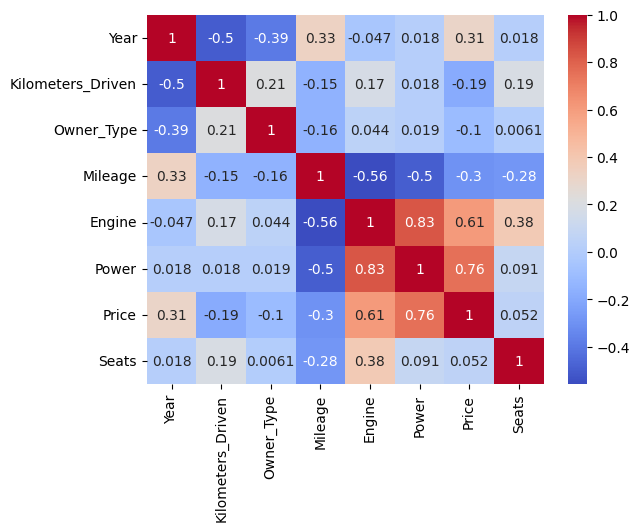

In [325]:
corr = X[['Year','Kilometers_Driven','Owner_Type','Mileage','Engine','Power','Price','Seats']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<h1>Training</h1>

In [326]:
Xmean = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].mean()
Xstd = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].std()
Ystd=Y_train.std().item()
Ymean=Y_train.mean().item()
X_train = normx(X_train)
Y_train = normy(Y_train)

In [327]:
print(X_train.isna().sum())


Year                   0
Kilometers_Driven      0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Fuel_Type_Electric     0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64


In [328]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [329]:
W_train = np.ones((X_train.shape[1], 1))
B_train= 0.0

In [330]:
def compute_cost(Y,Yp):
    cost = (Y-Yp)**2/(2*Y.size)
    return cost.sum()

def z_calc(X,W,B):
    return np.matmul(X,W)+B

In [331]:
Z_train=z_calc(X_train,W_train,B_train)
Z_train

array([[0.7598638363491601],
       [2.4440960008898296],
       [-0.0028232157313077266],
       ...,
       [-2.813190377486471],
       [0.8003506862327052],
       [-1.6974677166666692]], dtype=object)

In [332]:
print(X_train.shape)
print(Y_train.shape)
print(Z_train.shape)

(3564, 10)
(3564, 1)
(3564, 1)


In [333]:
W_history=[]
B_history=[]
Z_history=[]
J_history=[]
W_history.append(W_train)
B_history.append(B_train)
Z_history.append(Z_train)
J_history.append(compute_cost(Y_train,Z_train))

In [334]:
def gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train):
    for i in range(epoch):
        W_history.append(W_history[-1]-alpha/X_train.shape[0]*X_train.T@(Z_train-Y_train))
        B_history.append(B_history[-1]-alpha/X_train.shape[0]*np.sum((Z_train-Y_train)))
        Z_train = z_calc(X_train, W_history[-1], B_history[-1])
        Z_history.append(Z_train)
        J_history.append(compute_cost(Y_train,Z_train))
        if (i%10)==0:
            print("Iteration:",i, "Cost:", J_history[-1])

In [335]:
epoch=1000
alpha=.4
gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train)

Iteration: 0 Cost: 0.9722966602251384
Iteration: 10 Cost: 0.2211583565860073
Iteration: 20 Cost: 0.1884643335314313
Iteration: 30 Cost: 0.16988472054196307
Iteration: 40 Cost: 0.1581843306282451
Iteration: 50 Cost: 0.1506822168982393
Iteration: 60 Cost: 0.14583158250732037
Iteration: 70 Cost: 0.14268056598056536
Iteration: 80 Cost: 0.140627915586269
Iteration: 90 Cost: 0.13928844748302874
Iteration: 100 Cost: 0.13841337976386914
Iteration: 110 Cost: 0.13784125451692042
Iteration: 120 Cost: 0.13746698035527086
Iteration: 130 Cost: 0.1372220283091237
Iteration: 140 Cost: 0.13706165674700047
Iteration: 150 Cost: 0.13695662936616118
Iteration: 160 Cost: 0.1368878295634853
Iteration: 170 Cost: 0.1368427514026781
Iteration: 180 Cost: 0.13681321026485288
Iteration: 190 Cost: 0.13679384782911008
Iteration: 200 Cost: 0.13678115507946254
Iteration: 210 Cost: 0.13677283348024813
Iteration: 220 Cost: 0.13676737707509037
Iteration: 230 Cost: 0.13676379900076183
Iteration: 240 Cost: 0.13676145245007

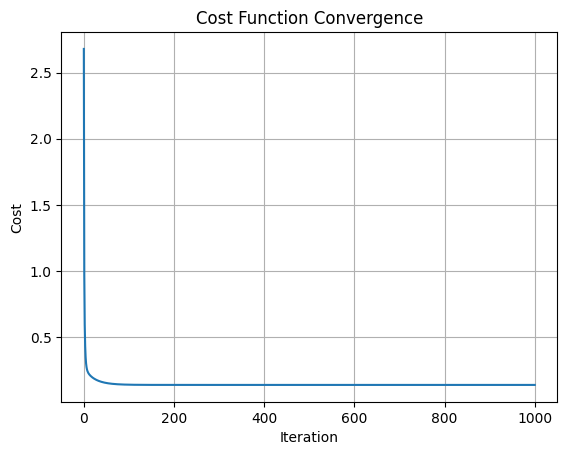

In [336]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

In [337]:
Y_train=Y_train*Ystd+Ymean
Z_train=Z_history[-1]
Z_train=Z_train*Ystd+Ymean

In [338]:
Z_train.min()

-14.299195953682494

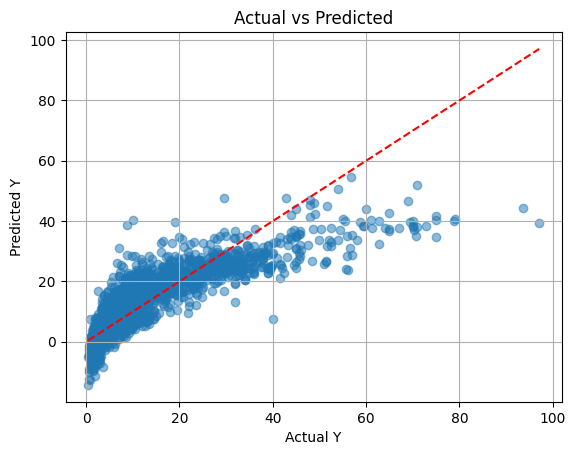

In [339]:
plt.scatter(Y_train, Z_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [340]:
ss_res = ((Y_train - Z_train) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_train - Y_train.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.7264092770137565


In [341]:
W=W_history[-1]
B=B_history[-1]

In [342]:
W.shape

(10, 1)

<h1>Testing Begins Here</h1>

In [343]:
X_test=pd.read_csv('Test.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_test=pd.read_csv('Test.csv', usecols=['Price'])

In [344]:
X_test=preprocessing(X_test)
X_test = normx(X_test)

In [345]:
X_test[X_test['Fuel_Type_Electric']==True]

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual
281,-0.753903,-0.09335,-0.439169,0.0,0.445211,-0.829004,-0.363223,True,False,False


In [346]:
#X_test = X_test.drop(columns=['Fuel_Type_Electric'])

In [347]:
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [348]:
Y_hat=X_test@W+B
Y_hat = Y_hat*Ystd+Ymean

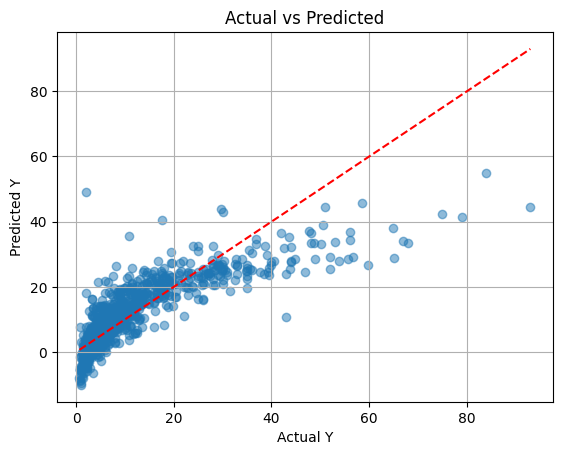

In [349]:
plt.scatter(Y_test, Y_hat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [350]:
ss_res = ((Y_test - Y_hat) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_test - Y_hat.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.6931752423623094


In [360]:
#R2 score 1 (No outlier removal): 0.5359170687614954
#R2 score 2 (After just adding mileage mask): 0.5467357536866696  
#R2 score 3 (Just engine mask and dropped Fuel_Type_Electric column and no mileage mask): 0.4311169862331051
#R2 score 4 (Mileage mask + Dropped column + Engine mask): 0.44219458559524594
#R2 score 5 (Mileage mask + Dropped column): 0.4297231575559941
#R2 score 6 (Mileage mask + Engine mask without removing the 72cc datapoint so that I don't have to drop the column): 0.5549321408556139
#R2 score 7 (Same as 6 but tweaking the engine mask to get best R2): 0.5554031301729788
#R2 score 8 (Added a power mask too): 0.5692372975661953
#R2 score 9 (Changed normx function): 0.6753593592824518
#R2 score 10 (Finally removed the 72cc anomoly): 0.6753775884824147
#R2 score 11 (Tweaked the power mask to increase r2 score): 0.6771829993019707
#R2 score 12 (Attempted log transformation): 0.6347122829626015
#R2 score 13 (Log transform on just kilometers_driven and Engine.): 0.693063452936226

In [ ]:
"""To try:
1- Ridge/Lasso regularisation
2- getdummies to get companies
